In [1]:
import os
import numpy as np
import mne

%matplotlib

Using matplotlib backend: <object object at 0x7fdeafc805e0>


Importation des données

In [2]:
path_of_the_directory= "/Volumes/florian.metzger_SSD/Stage EEG/Datasets/Dryad/doi_10.5061_dryad.9pf3t8d__v1/Iterated_raw_eegdata_sub01"
print("Files and directories in a specified path:");
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        print(f);

Files and directories in a specified path:
/Volumes/florian.metzger_SSD/Stage EEG/Datasets/Dryad/doi_10.5061_dryad.9pf3t8d__v1/Iterated_raw_eegdata_sub01/Trust_Repeated-adjust.dat
/Volumes/florian.metzger_SSD/Stage EEG/Datasets/Dryad/doi_10.5061_dryad.9pf3t8d__v1/Iterated_raw_eegdata_sub01/Trust_Repeated.dat
/Volumes/florian.metzger_SSD/Stage EEG/Datasets/Dryad/doi_10.5061_dryad.9pf3t8d__v1/Iterated_raw_eegdata_sub01/sub01.cnt


In [3]:
#Conversion des données cnt dans un format "raw"

raw_init = mne.io.read_raw_cnt(f)
print(raw_init.info.ch_names)

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEO', 'VEO']


Preprocessing

In [4]:
#suppression des channels HEO et VEO => ne pas supprimer mais utiliser pour corréler
raw = raw_init.copy()
raw.drop_channels(['HEO','VEO'])
print(raw.info.ch_names)

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']


In [5]:
#trouver des mauvaises chaînes
ssp_projectors = raw.info['projs'];
raw.del_proj();
# => pas de mauvaises chaînes d'identifiées avec cette fonction

In [6]:
#tentative de suppression des artefacts liés au battement de coeur
"""ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')""";

Using matplotlib as 2D backend.
Opening raw-browser...


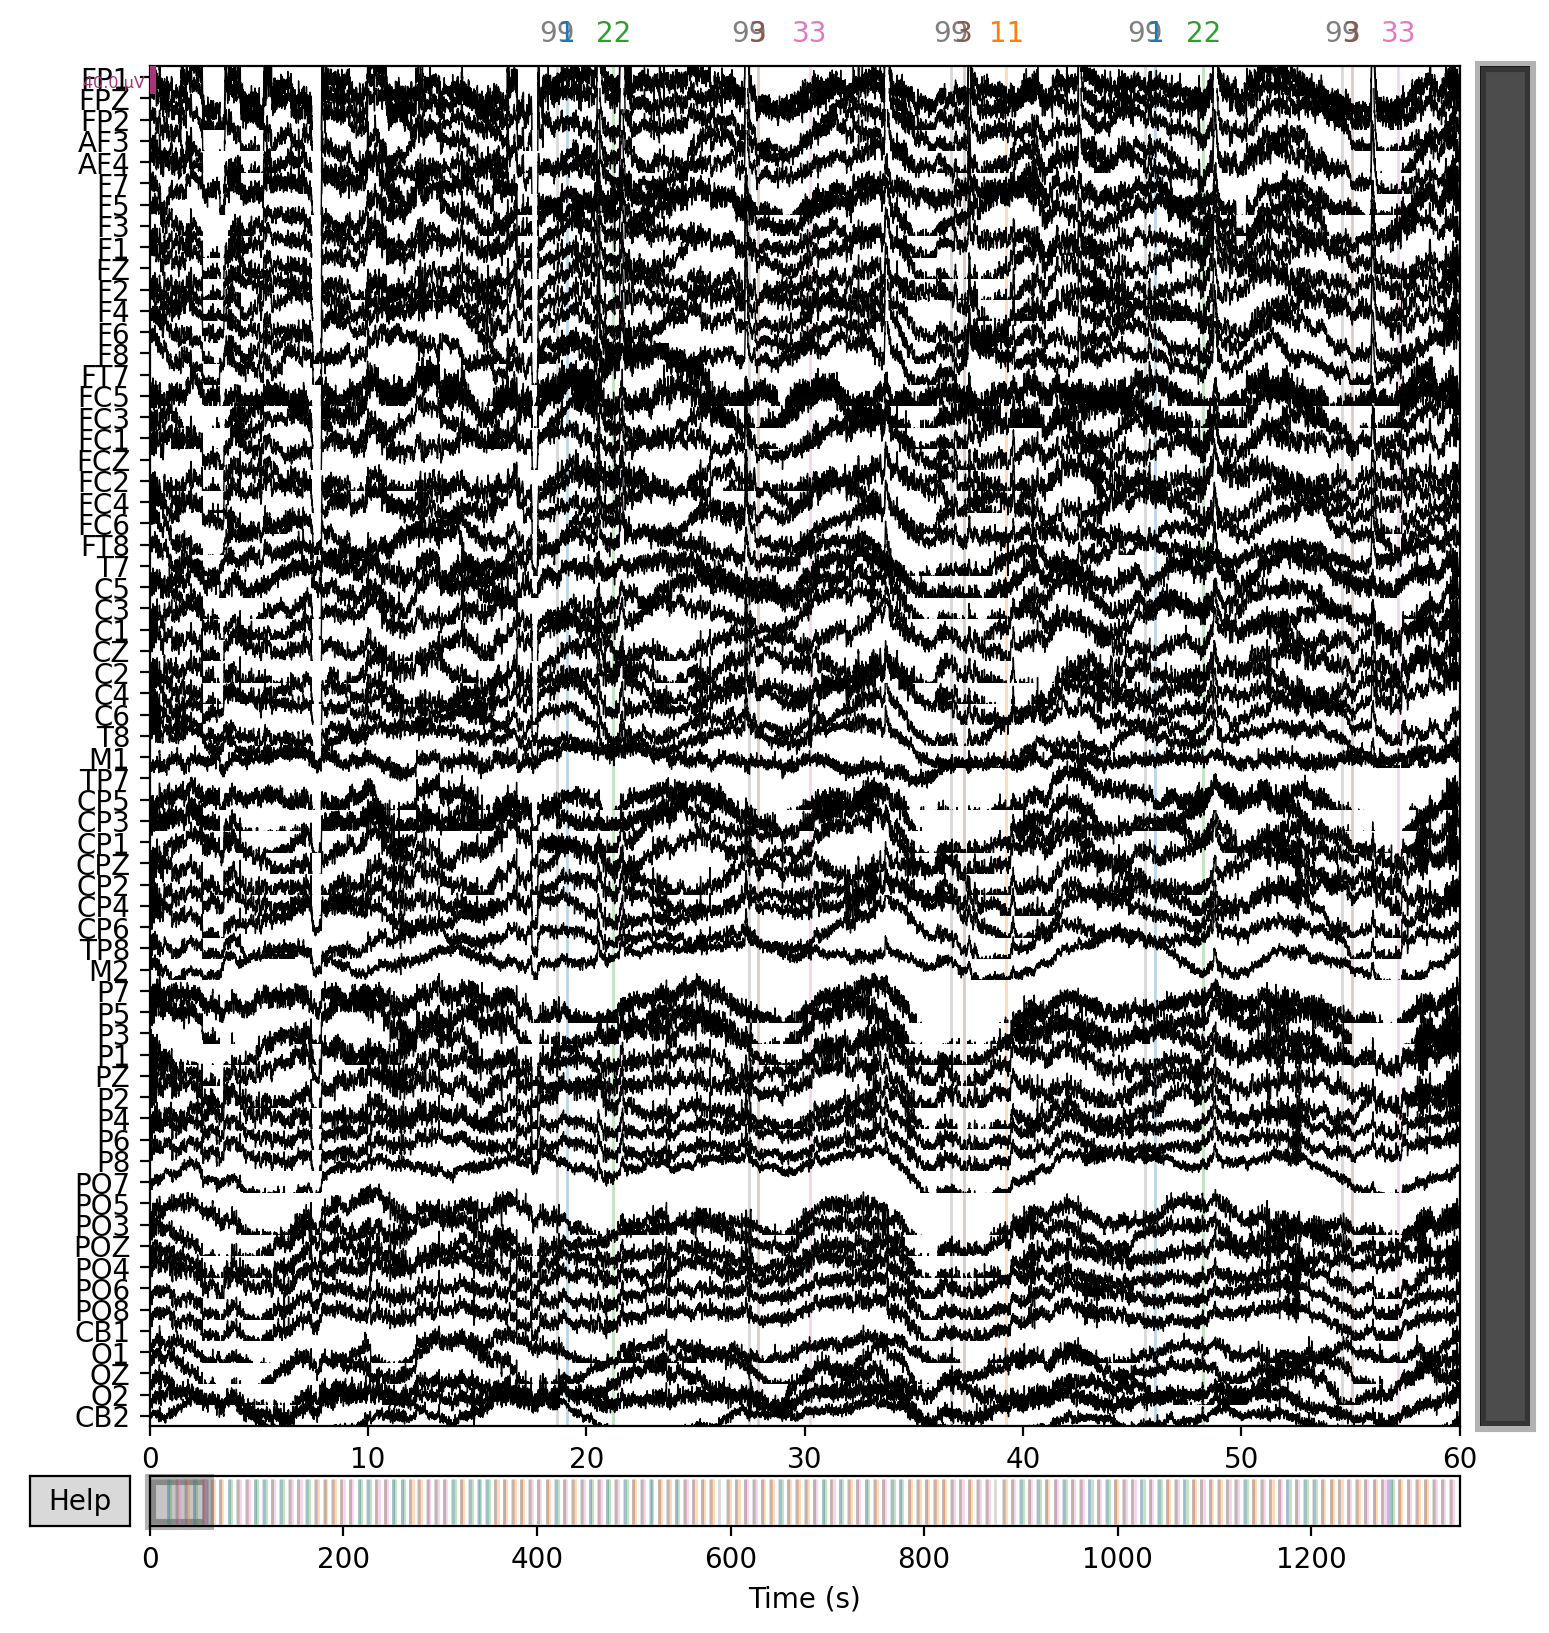

In [7]:
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names),
         remove_dc=False)
#quelle durée de plot choisir ?!

In [8]:
raw.load_data();

Reading 0 ... 1353239  =      0.000 ...  1353.239 secs...


In [9]:
#High filter

"""for cutoff in (0.1, 0.2):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    with mne.viz.use_browser_backend('matplotlib'):
        fig = raw_highpass.plot(duration=60, proj=False,
                                n_channels=len(raw.ch_names), remove_dc=False)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')""";

In [10]:
#Bandstop filter
raw_bandstop = raw.copy().filter(l_freq=45, h_freq=55)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 45 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 45.00
- Lower transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 61.88 Hz)
- Filter length: 295 samples (0.295 sec)



In [11]:
raw_bandstop.plot(duration=60, proj=False, n_channels=len(raw.ch_names),
         remove_dc=False)

raw = raw_bandstop

Opening raw-browser...


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Opening raw-browser...


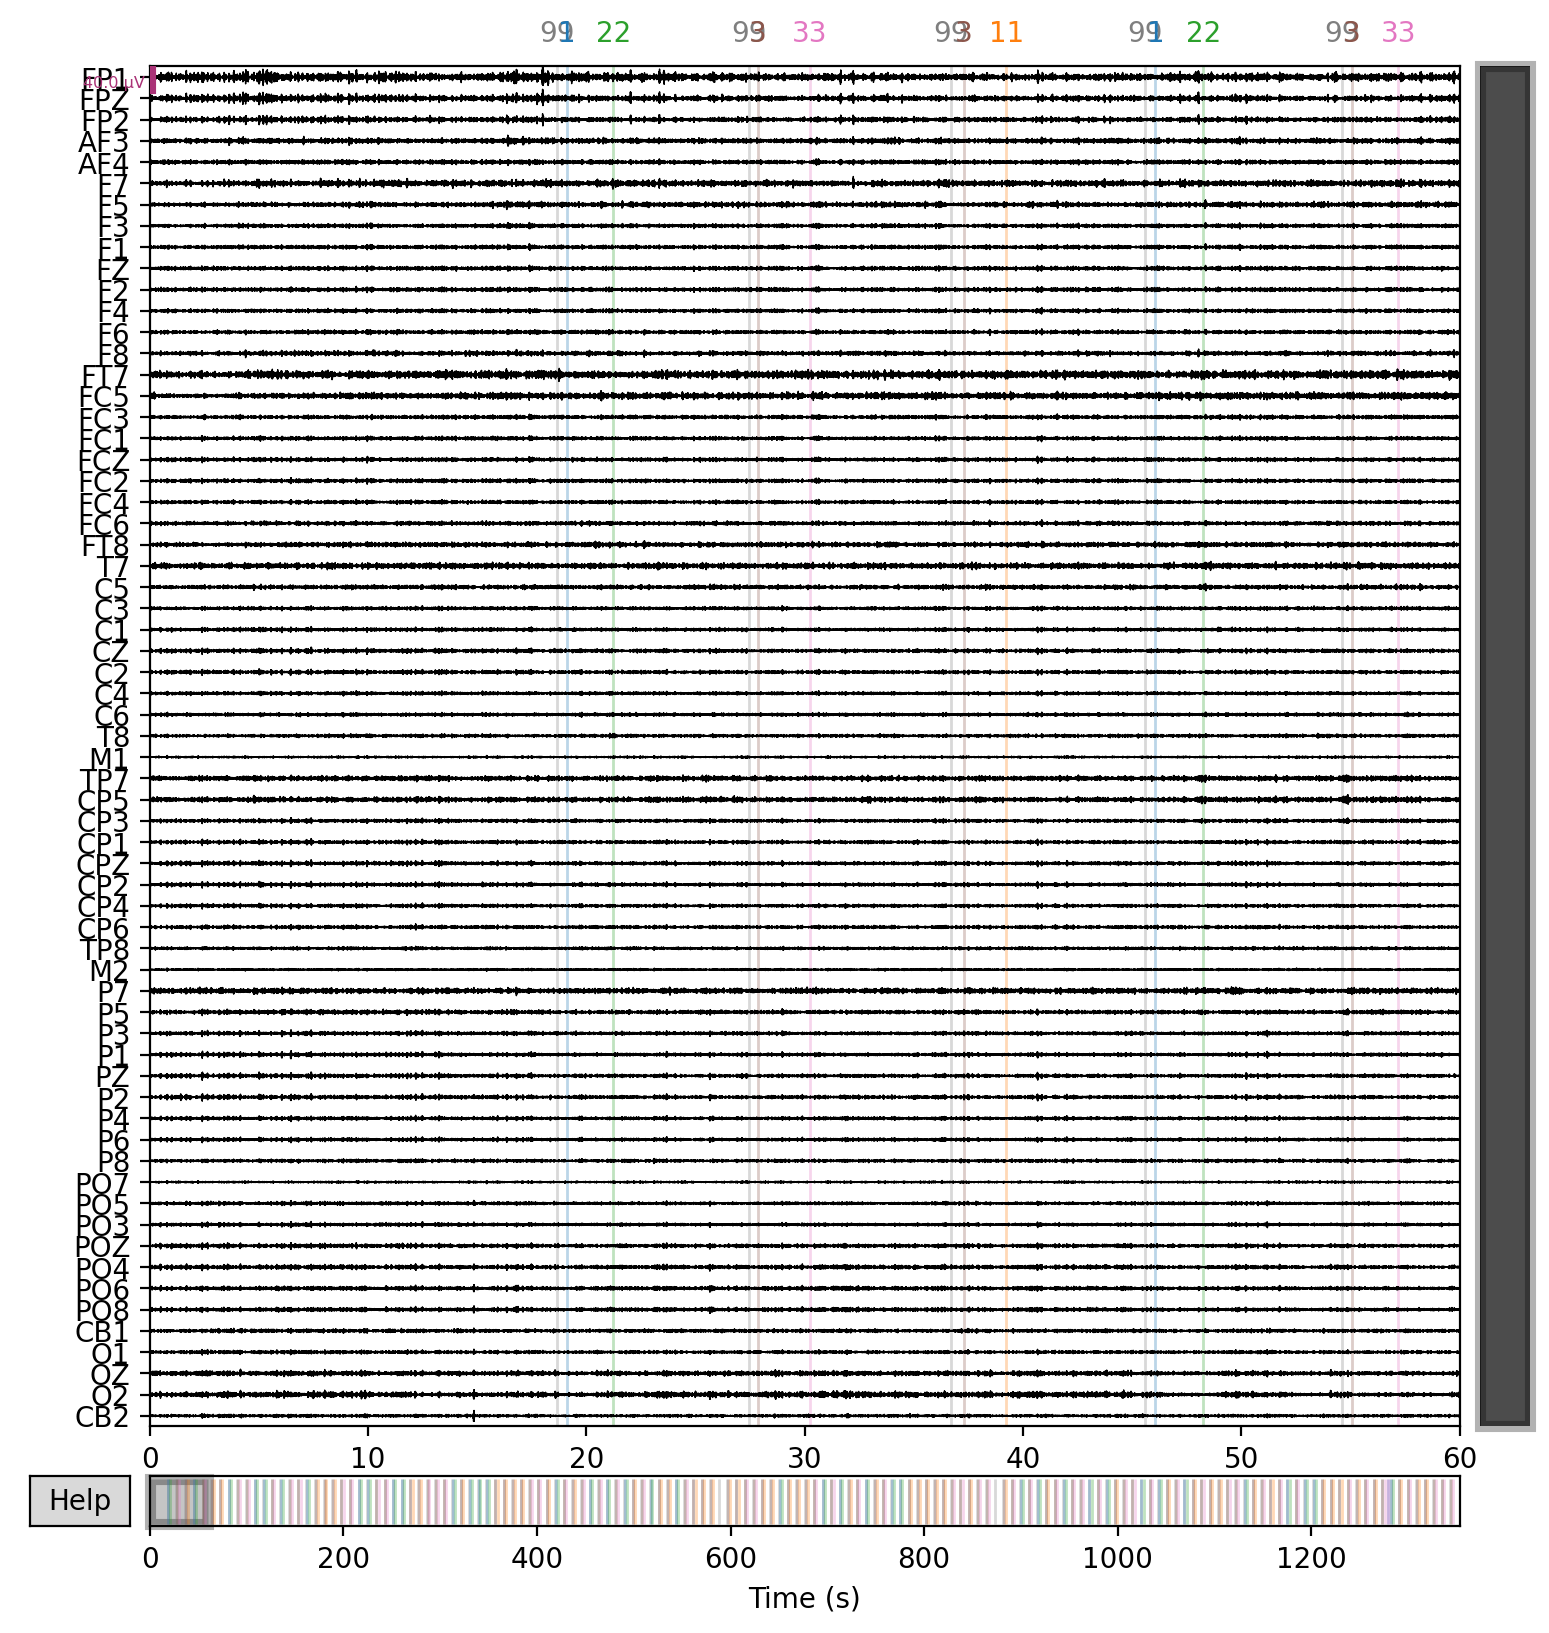

In [12]:
#Rereference to M1 + M2

raw.set_eeg_reference(ref_channels=['M1','M2'])
raw.plot(duration=60, proj=False, n_channels=len(raw.ch_names),
         remove_dc=False)

EPOCHING CONTINUOUS DATA

In [21]:
#je ne comprends pas si cette section a un effect -> les marqueurs devraient s'afficher mais ne le font pas

#BS: Quand tu créé ton dictionnaire d'évènements, tu associe tes annotations "1", "11", "22", "33"... à 
#des identifiants (1,2,3,4,5,6,7). C'est ceux que tu peux voir en faisant "print(event_dict)". Et toi ce 
#que tu veux changer après c'est pas forcément l'identifiant, c'est le nom associé. Donc il faut réutiliser les
#identifiants (1 à 7) et leur associer un nouveau nom. 
#Toi en fait tu ne conservais plus que les identifiants 1 et 3 (les deux seuls inclus dans [1-7]) que tu remplaçais
#par les noms "10" et "30". Donc tu perdais la majorité de tes évènements. Et en plus tu donnais deux fois le nom 10,
#pour les réponses et pour les feedbacks.
#Là normalement ça devrait fonctionner... ^^

events_from_annot, event_dict = mne.events_from_annotations(raw)
print(event_dict)
mapping = {1:"Rep_10", 2:"FB_0", 3:"FB_10", 4:"stop", 5:"Rep_30", 6:"FB_20", 7:"start"}

annot_from_events = mne.annotations_from_events(
    events=events_from_annot, 
    event_desc=mapping, 
    sfreq=raw.info['sfreq'],
    orig_time=raw.info['meas_date'])
raw.set_annotations(annot_from_events)

mne.set_log_level(verbose=False)

print(raw.annotations)
#print(len(raw.annotations))

for i in range(len(raw.annotations)):
    raw.annotation.description
    
    
    print(raw.annotations[i])

{'FB_0': 1, 'FB_10': 2, 'FB_20': 3, 'Rep_10': 4, 'Rep_30': 5, 'start': 6, 'stop': 7}
OrderedDict([('onset', 18.651), ('duration', 0.0), ('description', 'FB_10'), ('orig_time', datetime.datetime(2013, 8, 7, 13, 3, 20, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 19.105), ('duration', 0.0), ('description', 'start'), ('orig_time', datetime.datetime(2013, 8, 7, 13, 3, 20, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 21.238), ('duration', 0.0), ('description', 'Rep_10'), ('orig_time', datetime.datetime(2013, 8, 7, 13, 3, 20, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 27.451), ('duration', 0.0), ('description', 'FB_10'), ('orig_time', datetime.datetime(2013, 8, 7, 13, 3, 20, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 27.838), ('duration', 0.0), ('description', 'Rep_30'), ('orig_time', datetime.datetime(2013, 8, 7, 13, 3, 20, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 30.225), ('duration', 0.0), ('description', 'FB_0'), ('orig_time'

In [14]:
#La tu prends l'ensemble des évènement pour créer des épochs. Tu as 448 évènements au total et tu crées 448 epochs (en plus tu réutilises les anciennes valeurs de event_dict et annotations)
#Nous on veut sélectionner, grâce aux nouveaux évènements, les moments 'start' où s'affiche le choix possible
#Et ensuite les moments où s'affiche le feedback (soit FB_O, FB_10 ou FB_20) mais dans un jeux de données séparé.
events_from_annot, event_dict = mne.events_from_annotations(raw_bandstop)
epochs = mne.Epochs(raw, events_from_annot, event_id=event_dict, tmin=-0.2, tmax=1,
                    preload=True)
fig = epochs.plot(events=events_from_annot)


In [15]:
epochs_choice = epochs['start']
epochs_FB = epochs[['FB_0','FB_10','FB_20']]
epochs_Rep = epochs['Rep_10','Rep_30']
epochs_stop = epochs['stop']

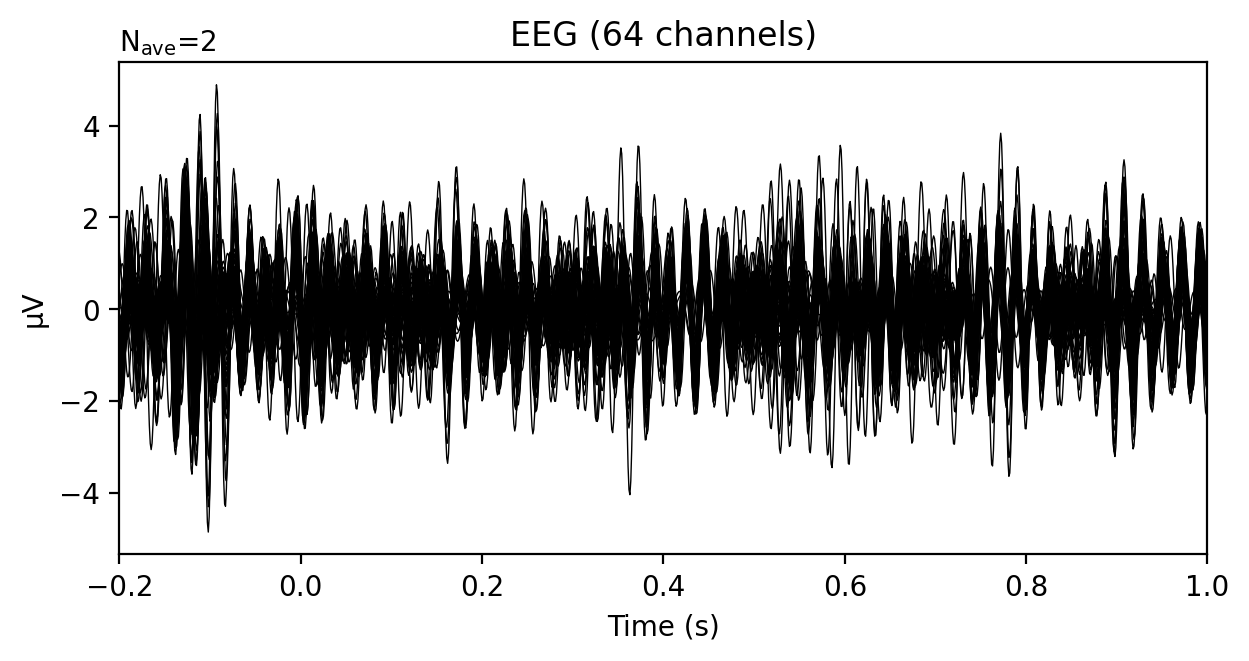

In [16]:
epochs_choice.average().plot()
epochs_FB.average().plot()
epochs_Rep.average().plot()
epochs_stop.average().plot()

Tu obtiens quelque chose de tout à fait normal. Mais il y a plusieurs choses:
- Le tracé qui fait du grand n'importe quoi, si tu cliques dessus tu verras que c'est l'EOG vertical: donc c'est des électrodes mises autour des yeux pour voir quand il y a des clignements etc; Ce n'est pas de l'activité cérébrale. Les amplitudes EOG sont beaucoup plus grandes, et vu qu'elles ne dépendent pas des évèneent (affichage, stimulation) envoyé, si tu les moyennes ça ne donne rien.
- Tu n'as pas du tout pré-traité tes données. Tu as pris les données brutes que tu as découpées et moyennées, donc c'est normal qu'elles soient bruitées. 

In [17]:
evoked = epochs['start'].average()

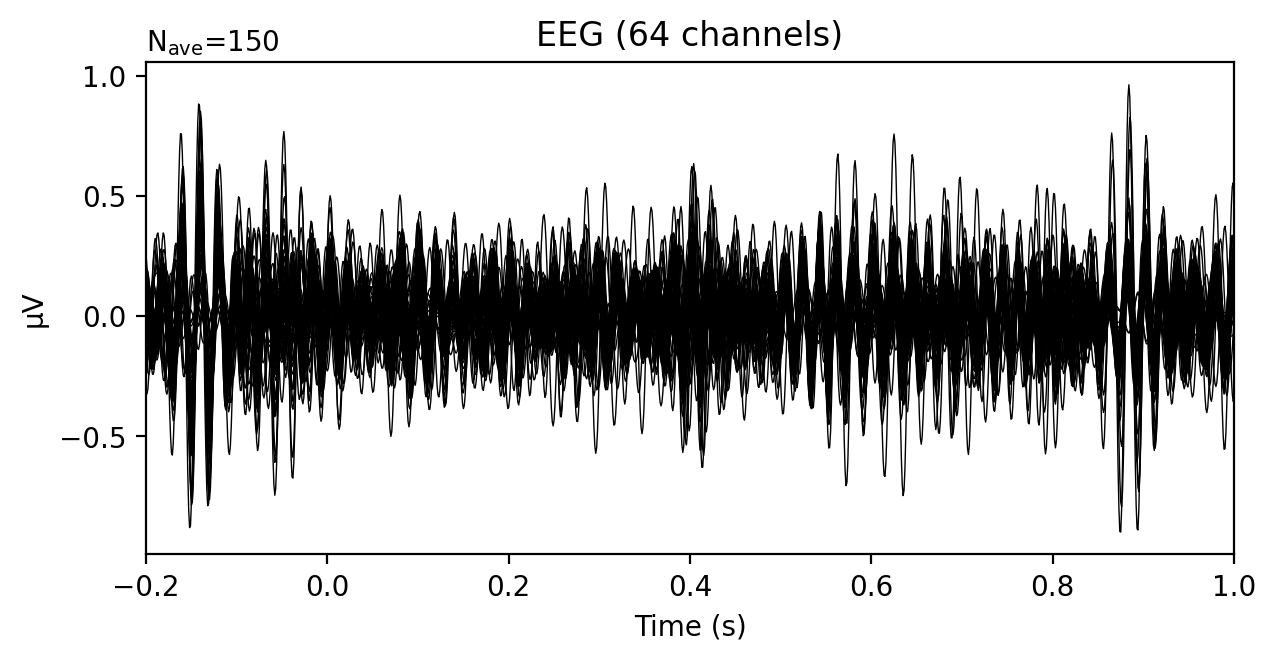

In [18]:
evoked.plot()

In [19]:
raw.ch_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2']